In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# listing file name
filenames = []
for i in range(16,21):
    f = ("H1B_"+str(i)+".csv")
    filenames.append(f)   
print(filenames)

# listing columns needed
features = '''CASE_STATUS,DECISION_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,EMPLOYER_NAME,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY'''
features = features.split(',')
print(features)


['H1B_16.csv', 'H1B_17.csv', 'H1B_18.csv', 'H1B_19.csv', 'H1B_20.csv']
['CASE_STATUS', 'DECISION_DATE', 'VISA_CLASS', 'JOB_TITLE', 'SOC_CODE', 'SOC_TITLE', 'EMPLOYER_NAME', 'WORKSITE_CITY', 'WORKSITE_COUNTY', 'WORKSITE_STATE', 'WORKSITE_POSTAL_CODE', 'WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY']


In [3]:
# selecting columns in CSV file
def h1b_col(name):
    s = pd.read_csv(name)
    s = s[features]
    return s

# concatenate files in the list
#combined_csv = pd.concat([h1b_col(f) for f in filenames ] )
#combined_csv.to_csv("H1B_5Y.csv") 
#combined_csv



In [4]:
df = pd.read_csv("H1B_5Y.csv")
df = df.reset_index(drop=True)
df

,Unnamed: 0,CASE_STATUS,DECISION_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,EMPLOYER_NAME,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY
0,0,CERTIFIED-WITHDRAWN,2015-10-16,H-1B,POSTDOCTORAL RESEARCH FELLOW,10-1021.00,BIOCHEMISTS AND BIOPHYSICISTS,UNIVERSITY OF MICHIGAN,ANN ARBOR,WASHTENAW,MI,48109,"41,000.00",Year,"36,067.00",Year
1,1,CERTIFIED-WITHDRAWN,2016-01-13,H-1B,CHIEF OPERATING OFFICER,11-1011,CHIEF EXECUTIVES,"GOODMAN NETWORKS, INC.",PLANO,COLLIN,TX,75093,"400,000.00",Year,"242,674.00",Year
2,2,CERTIFIED-WITHDRAWN,2015-12-10,H-1B,CHIEF PROCESS OFFICER,11-1011,CHIEF EXECUTIVES,"PORTS AMERICA GROUP, INC.",JERSEY CITY,HUDSON,NJ,07310,"264,000.00",Year,"193,066.00",Year
3,3,CERTIFIED-WITHDRAWN,2016-01-19,H-1B,"REGIONAL PRESIDEN, AMERICAS",11-1011,CHIEF EXECUTIVES,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",DENVER,DENVER,CO,80202,"220,314.00",Year,"220,314.00",Year
4,4,WITHDRAWN,2016-05-20,H-1B,PRESIDENT MONGOLIA AND INDIA,11-1011,CHIEF EXECUTIVES,PEABODY INVESTMENTS CORP.,ST. LOUIS,ST. LOUIS,MO,63101,171.63,Hour,75.73,Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3448746,473337,Withdrawn,2020-03-11,H-1B,CHIEF MARKETING OFFICER,11-2021,MARKETING MANAGERS,SWIM.AI INC.,SAN JOSE,SANTA CLARA,CA,95113,"$236,018.00",Year,NaN,NaN
3448747,473338,Withdrawn,2020-03-23,H-1B,PHYSICIAN (HOSPITALIST),29-1063,"INTERNISTS, GENERAL",MEMORIAL HOSPITAL OF LARAMIE COUNTY,CHEYENNE,LARAMIE,WY,82001,"$250,000.00",Year,NaN,NaN
3448748,473339,Withdrawn,2019-10-02,H-1B,"ASSISTANT PROFESSOR, INTERVENTIONAL CARDIOLOGI...",29-9099,"HEALTHCARE PRACTITIONERS AND TECHNICAL WORKERS,",RUSH UNIVERSITY MEDICAL CENTER,CHICAGO,COOK,IL,60612,"$285,000.00",Year,NaN,NaN
3448749,473340,Withdrawn,2019-10-04,H-1B,"CARDIOLOGIST, ASSISTANT PROF. & DIRECTOR",29-9099,"HEALTHCARE PRACTITIONERS AND TECHNICAL WORKERS,",RUSH UNIVERSITY MEDICAL CENTER,CHICAGO,COOK,IL,60612,"$285,000.00",Year,NaN,NaN


In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448751 entries, 0 to 3448750
Data columns (total 16 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Unnamed: 0             int64 
 1   CASE_STATUS            object
 2   DECISION_DATE          object
 3   VISA_CLASS             object
 4   JOB_TITLE              object
 5   SOC_CODE               object
 6   SOC_TITLE              object
 7   EMPLOYER_NAME          object
 8   WORKSITE_CITY          object
 9   WORKSITE_COUNTY        object
 10  WORKSITE_STATE         object
 11  WORKSITE_POSTAL_CODE   object
 12  WAGE_RATE_OF_PAY_FROM  object
 13  WAGE_UNIT_OF_PAY       object
 14  PREVAILING_WAGE        object
 15  PW_UNIT_OF_PAY         object
dtypes: int64(1), object(15)
memory usage: 421.0+ MB


In [6]:
df.dropna(inplace = True)
df.isna( ).sum().sum()

0

In [7]:
df['CASE_STATUS'].str.lower().unique()

array(['certified-withdrawn', 'withdrawn', 'certified', 'denied',
       'certified - withdrawn'], dtype=object)

In [8]:
df['CASE_STATUS'] = df['CASE_STATUS'].str.lower()
df = df[df['CASE_STATUS'] == 'certified']
df

,Unnamed: 0,CASE_STATUS,DECISION_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,EMPLOYER_NAME,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,PREVAILING_WAGE,PW_UNIT_OF_PAY
18,18,certified,2015-11-18,H-1B,CEO,11-1011,CHIEF EXECUTIVES,QUICKLOGIX LLC,SANTA CLARA,SANTA CLARA,CA,95054,90.00,Hour,90.00,Hour
19,19,certified,2015-10-20,H-1B,"PRESIDENT, NORTHEAST REGION",11-1011,CHIEF EXECUTIVES,"MCCHRYSTAL GROUP, LLC",ALEXANDRIA,ALEXANDRIA CITY,VA,22134,"245,000.00",Year,"241,842.00",Year
22,22,certified,2015-10-06,H-1B,CEO,11-1011,CHIEF EXECUTIVES,"LOMICS, LLC",SAN DIEGO,SAN DIEGO,CA,92117,"100,000.00",Year,"99,986.00",Year
23,23,certified,2015-10-02,H-1B,CHIEF FINANCIAL OFFICER,11-1011,CHIEF EXECUTIVES,UC UNIVERSITY HIGH SCHOOL EDUCATION INC.,CHULA VISTA,SAN DIEGO,CA,91910,"100,000.00",Year,"99,986.00",Year
25,25,certified,2016-01-07,H-1B,CEO,11-1011,CHIEF EXECUTIVES,"QUICKLOGIX, INC.",SANTA CLARA,SANTA CLARA,CA,95054,90.00,Hour,90.00,Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413704,438295,certified,2020-02-20,H-1B,Physician - Gastroenterologist,29-1063,"Internists, General","Spartanburg Regional Health Services District,...",Spartanburg,SPARTANBURG,SC,29303,"$345,796.00",Year,"$345,796.00",Year
3413705,438296,certified,2019-10-17,H-1B,Resident Physician / Oncology,29-1069,Pathologists,"Saint Alphonsus Regional Medical Center, Inc.",Boise,ADA,ID,83706,"$349,200.00",Year,"$349,200.00",Year
3413706,438297,certified,2020-04-09,H-1B,Chief Executive Officer,11-1011,Chief Executives,"Ferring Pharmaceuticals, Inc.",Parsippany,MORRIS,NJ,07054,"$651,001.00",Year,"$380,151.00",Year
3413707,438298,certified,2020-02-10,H-1B,Pulmonary/Critical Care Physician,29-1069,"Physicians and Surgeons, All Other",Riverside Medical Center,Kankakee,KANKAKEE,IL,60901,"$450,000.00",Year,"$431,637.00",Year


In [9]:
df["year"] = pd.to_datetime(df["DECISION_DATE"])
df["year"] = df["year"].dt.year
df["year"].head()
df = df[df['year'] > 2015]


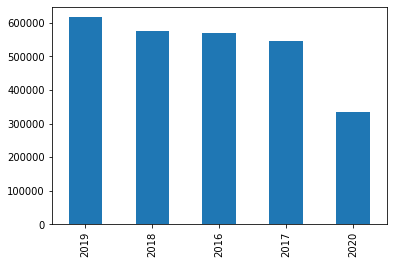

In [10]:
year_count = df['year'].value_counts().sort_values(ascending=False)
year_count.plot.bar()

In [11]:
df['PREVAILING_WAGE_Float'] = df['PREVAILING_WAGE'].astype('str').str.replace('$',"")
df['PREVAILING_WAGE_Float'] = df['PREVAILING_WAGE_Float'].str.replace(',',"").astype('float')
df['PREVAILING_WAGE_Float']

25             90.0
65         221541.0
66         198266.0
67         221541.0
68         187075.0
             ...   
3413704    345796.0
3413705    349200.0
3413706    380151.0
3413707    431637.0
3413708    760202.0
Name: PREVAILING_WAGE_Float, Length: 2640398, dtype: float64

In [12]:
df['WAGE_UNIT_OF_PAY'].value_counts()

Year         2471346
Hour          166143
Month           1778
Week             667
Bi-Weekly        464
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [13]:
salary_normalizer = {"Year":1, "Hour": 2080, "Month": 12, "Bi-Weekly": 24}
df["pw_normalizer"] = df["PW_UNIT_OF_PAY"].map(salary_normalizer)
df["PREVAILING_WAGE_NORM"] = df["PREVAILING_WAGE_Float"] * df["pw_normalizer"]
df["PREVAILING_WAGE_NORM"]

25         187200.0
65         221541.0
66         198266.0
67         221541.0
68         187075.0
             ...   
3413704    345796.0
3413705    349200.0
3413706    380151.0
3413707    431637.0
3413708    760202.0
Name: PREVAILING_WAGE_NORM, Length: 2640398, dtype: float64

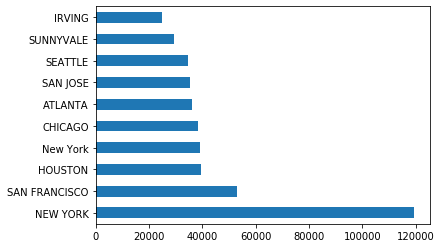

In [14]:
df['WORKSITE_STATE'] = df['WORKSITE_STATE'].replace("New York","NEW YORK")
df['WORKSITE_CITY'].value_counts().head(10).plot(kind='barh')

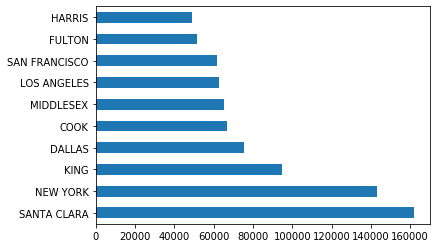

In [15]:
df['WORKSITE_COUNTY'].value_counts().head(10).plot(kind='barh')

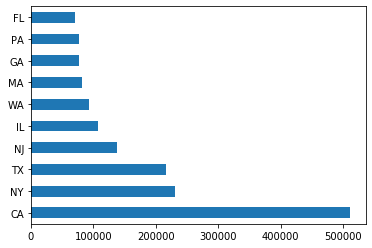

In [16]:
df['WORKSITE_STATE'] = df['WORKSITE_STATE'].replace("CALIFORNIA","CA").replace("NEW YORK","NY")
df['WORKSITE_STATE'].value_counts().head(10).plot(kind='barh')

In [17]:
df_Biz_IT = df[df['SOC_CODE'].str[:2] == ("13" or "15")]

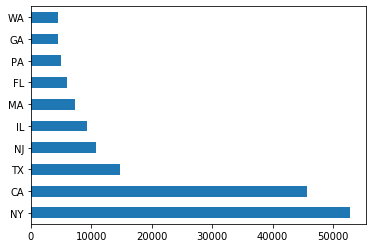

In [18]:
df_Biz_IT['WORKSITE_STATE'].value_counts().head(10).plot(kind='barh')

In [41]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = 'brandon.swpark@gmail.com')
loc = geolocator.geocode("Parsippany, nj")
loc

Location(Parsippany, Parsippany-Troy Hills, Morris County, New Jersey, 07054, United States of America, (40.8578772, -74.4259866, 0.0))

In [45]:
df['WORKSITE_CITY_STATES'] = df['WORKSITE_CITY'] +","+ df['WORKSITE_STATE']
df_list = df['WORKSITE_CITY_STATES'].values. tolist()
df_list

['SANTA CLARA,CA',
 'LAKE MARY,FL',
 'MARIETTA,GA',
 'ALTAMONTE SPRINGS,FL',
 'CHARLOTTESVILLE,VA',
 'MECHANICSBURG,PA',
 'SANTA ROSA,CA',
 'IRVING,TX',
 'LIVONIA,MI',
 'ALBANY,NY',
 'NAPLES,FL',
 'OAKLAND,CA',
 'SAN DIEGO,CA',
 'HIALEAH,FL',
 'CHICAGO,IL',
 'LANHAM,MD',
 'CHESTERFIELD,MO',
 'LANHAM,MD',
 'DORAL,FL',
 'ORLANDO,FL',
 'MIAMI,FL',
 'CINCINNATI,OH',
 'CARSON,CA',
 'CHAMPION,MI',
 'TRACY,CA',
 'CANTON,MA',
 'LAS VEGAS,NV',
 'CHARLOTTESVILLE,VA',
 'HENDERSONVILLE,NC',
 'BRANDON,FL',
 'BEVERLY HILLS,CA',
 'NEW YORK,NY',
 'SANTA MONICA,CA',
 'CHICAGO,IL',
 'RESTON,VA',
 'BRADFORD,PA',
 'MIAMI,FL',
 'NEW YORK,NY',
 'NORTHBROOK,IL',
 'KALAMAZOO,MI',
 'NEW YORK,NY',
 'HIALEAH,FL',
 'ATLANTA,GA',
 'BERKELEY,CA',
 'WASHINGTON,DC',
 'GARDENA,CA',
 'EDEN PRAIRIE,MN',
 'CHARLOTTE,NC',
 'SCOTTSDALE,AZ',
 'BERKELEY,CA',
 'KIRKLAND,WA',
 'OXNARD,CA',
 'LEXINGTON,MA',
 'NORTHUMBERLAND,NY',
 'GLENS FALLS,NY',
 'BOSTON,MA',
 'SOUTH EASTON,MA',
 'NEW YORK,NY',
 'WILMINGTON,NC',
 'NEW YORK,NY

In [46]:
location = []

for i in df_list:
    k = geolocator.geocode(i)
    location.append(k[1][0:2])

location

TypeError: 'NoneType' object is not subscriptable